In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [47]:
import os 
os.listdir()

['.config',
 'do-you-play-video-games-wanna-do-business-with-it.ipynb',
 'Video_Games_Sales_as_at_22_Dec_2016.csv',
 'sample_data']

In [48]:
data=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [49]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [50]:
data.shape

(16719, 16)

In [51]:
data.drop(["Critic_Score","Critic_Count","User_Score","User_Count","Developer","Rating"],axis=1,inplace=True)
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [52]:
data["Year_of_Release"].fillna(2010,inplace=True)

In [53]:
data.isnull().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
dtype: int64

In [54]:
data.loc[data["Genre"].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03


In [55]:
data.drop([659,14246],axis=0,inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [57]:
data["Year_of_Release"]=data["Year_of_Release"].astype("int64")

In [58]:
data["Publisher"].fillna("PS2",inplace=True)

In [59]:
categorical=["Platform","Name","Genre","Publisher"]
numerical=list(set(data.columns) ^ set(categorical))
numerical

['Year_of_Release',
 'EU_Sales',
 'JP_Sales',
 'Global_Sales',
 'Other_Sales',
 'NA_Sales']

In [60]:
for i in categorical:
    print(i)
    print(np.unique(data[i])[:10])
    if(len(np.unique(data[i]))>10):
        print("....")
    
    print(data[i].describe())
    
    print()
    
    

Platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG']
....
count     16717
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

Name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest"
 ' Haikyu!! Cross Team Match!' ' Tales of Xillia 2' "'98 Koshien"
 '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 '.hack//G.U. Vol.2//Reminisce (jp sales)' '.hack//G.U. Vol.3//Redemption']
....
count                           16717
unique                          11562
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

Genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation']
....
count      16717
unique        12
top       Action
freq        3370
Name: Genre, dtype: object

Publisher
['10TACLE Studios' '1C Company' '20th Century Fox Video Games' '2D Boy'
 '3DO' '49Games' '505 Games' '5pb' '7G//AMES' '989 Sports']
....
count         

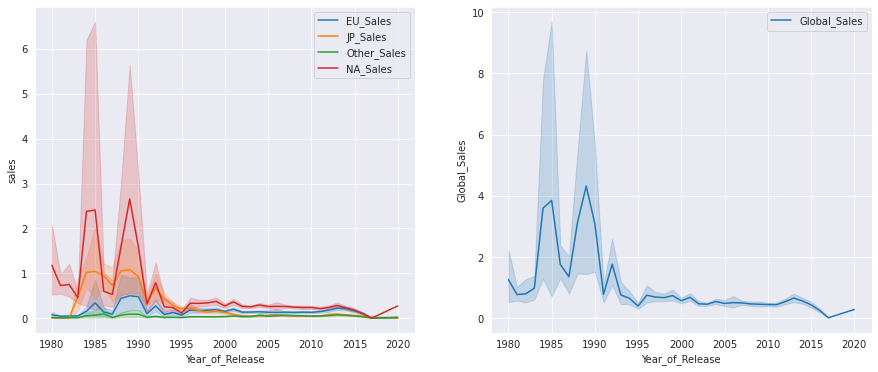

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6));
for i in numerical:
    if(i == "Year_of_Release"  or i == "Global_Sales"):
        continue
    sns.lineplot(x=data["Year_of_Release"],y=data[i],ax=ax[0],label=i);
    ax[0].set_ylabel("sales");

sns.lineplot(x=data["Year_of_Release"],y=data["Global_Sales"],ax=ax[1],label="Global_Sales");
   

    

## Which patform has more sales?

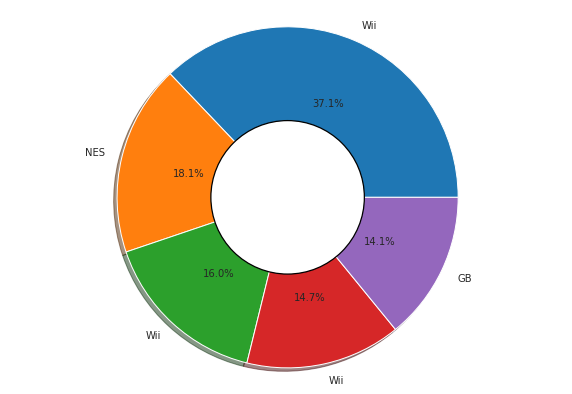

In [62]:
game = data.loc[:,['Platform','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game = game.head()

fig = plt.figure(figsize=(10,7))
plt.pie(game['Global_Sales'], labels=game['Platform'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

categorical

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


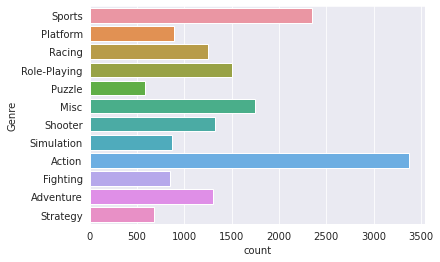

In [64]:

sns.countplot(y=data["Genre"]);
sns.set_style("darkgrid");


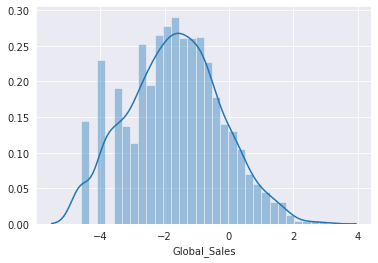

In [65]:
action=data.loc[data["Genre"]=="Action"]
sns.distplot(np.log(action["Global_Sales"]))


In [66]:
action["Name"].describe()

count                         3370
unique                        1958
top       LEGO Marvel Super Heroes
freq                             9
Name: Name, dtype: object

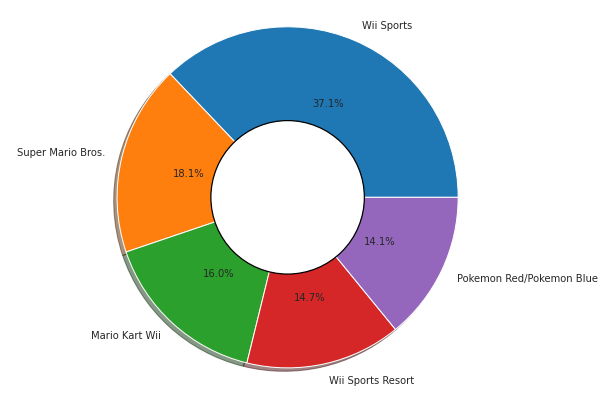

In [67]:
action = data.loc[:,['Name','Global_Sales']]
action = action.sort_values('Global_Sales', ascending=False)
action = action.head()

fig = plt.figure(figsize=(10,7))
plt.pie(action['Global_Sales'], labels=action['Name'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

TOP 3 GAMES OF EACH GENRE


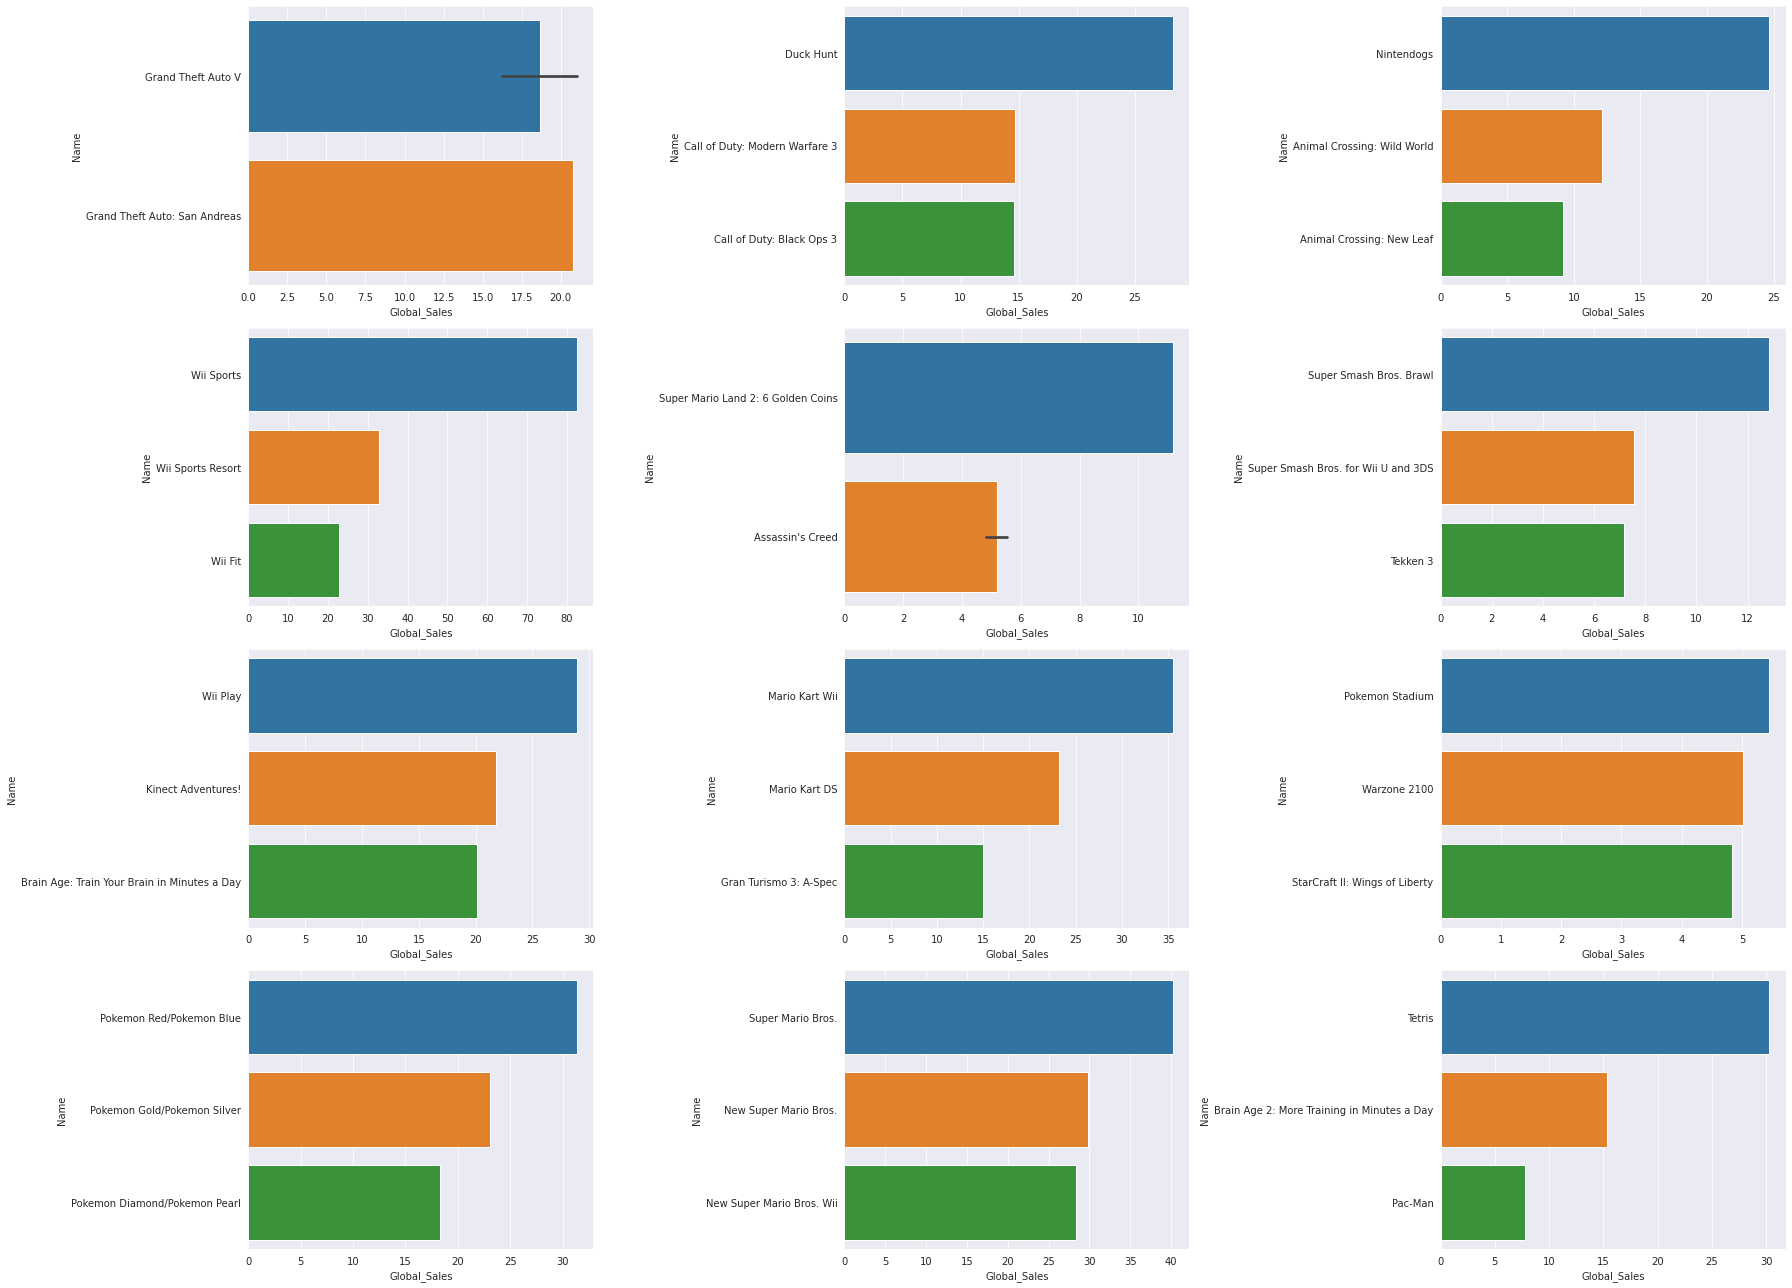

In [68]:
print("TOP 3 GAMES OF EACH GENRE")
fig,ax=plt.subplots(4,3,figsize=(25,18))
genres = data['Genre'].value_counts().reset_index()['index'].tolist()
index=0
# print(ax[0][0])
indexArr=list([(i,j) for j in range(3) for i in range(4)])
# print(indexArr)


for genre,num in zip(genres,range(1,13)):
    df = data[data['Genre']==genre]
    df = df.sort_values('Global_Sales', ascending=False)
    df = df.head(3)
    # plt.figure()
    sns.barplot(data=df, x='Global_Sales', y='Name',ax=ax[indexArr[index][0]][indexArr[index][1]]);
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    

    # .show()
    index+=1


In [69]:
publisher=data.loc[:,["Publisher","Global_Sales"]]
publisher["total_sales"]=publisher.groupby("Publisher")["Global_Sales"].transform(sum)
publisher.drop('Global_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.head(10)

fig=px.pie(publisher,names="Publisher",values="total_sales",template="seaborn")
fig.update_traces(rotation=90,pull=[0.2,0.1,0.1,0.1,0.1],textinfo="percent+label")
fig.show()

In [70]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

## Top 5 publishers per year

In [81]:
top_5_publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Ubisoft', 'Sony Computer Entertainment']
perc =data[["Year_of_Release","Publisher",'Global_Sales']]

perc['total_sales'] = perc.groupby([perc.Publisher,perc.Year_of_Release])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year_of_Release'].astype('float')>=2006.0)]
perc = perc.sort_values("Year_of_Release",ascending = False)
perc = perc.loc[perc['Publisher'].isin(top_5_publishers)]
perc = perc.sort_values("Year_of_Release")
fig=px.bar(perc,x='Publisher', y="total_sales", animation_frame="Year_of_Release", 
           animation_group="Publisher", color="Publisher", hover_name="Publisher")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

